In [1]:
log_path_proba = '01_dirichlet/2025-10-13'
log_path_mh = '01_dirichlet/2025-10-13/09-40-27'

In [2]:
import numpy as np
import re
import os
from omegaconf import OmegaConf

In [3]:
def get_metrics(data):
    train_pattern = re.compile(r"Train, Round\s+(\d+): Loss=([\d\.]+), Accuracy=([\d\.]+)(, gradient_norm=([\d\.]+))?")
    # Regex to extract test metrics
    test_pattern = re.compile(r"Test, Round\s+(\d+): Loss=([\d\.]+), Accuracy=([\d\.]+)")
    rounds, train_losses, train_accuracies, grads = [], [], [], []
    test_rounds, test_losses, test_accuracies = [], [], []

    for match in train_pattern.finditer(data):
        rounds.append(int(match.group(1)))
        train_losses.append(float(match.group(2)))
        train_accuracies.append(float(match.group(3)))
        if match.group(4):
            grads.append(float(match.group(5)))


    # Parse test logs
    for match in test_pattern.finditer(data):
        test_rounds.append(int(match.group(1)))
        test_losses.append(float(match.group(2)))
        test_accuracies.append(float(match.group(3)))
        
    return train_losses, train_accuracies, test_losses, test_accuracies, grads

In [4]:
res_proba = {}
for log_dir in os.listdir(log_path_proba):
    log_file  = f'{log_path_proba}/{log_dir}'
    with open(f'{log_file}/main.log', 'r') as f:
        data = f.read()
    config_file = OmegaConf.load(f'{log_file}/.hydra/config.yaml') 
    train_losses, train_accuracies, test_losses, test_accuracies, grads = get_metrics(data)
    res_proba[log_dir.split('/')[-1]] = [train_losses, train_accuracies, test_losses, test_accuracies, grads]
    
res_mh = {}
for log_dir in os.listdir(log_path_mh):
    log_file  = f'{log_path_mh}/{log_dir}'
    with open(f'{log_file}/main.log', 'r') as f:
        data = f.read()
    config_file = OmegaConf.load(f'{log_file}/.hydra/config.yaml') 
    train_losses, train_accuracies, test_losses, test_accuracies, grads = get_metrics(data)
    res_mh[log_dir.split('/')[-1]] = [train_losses, train_accuracies, test_losses, test_accuracies, grads]

FileNotFoundError: [Errno 2] No such file or directory: '01_dirichlet/2025-10-13/09-40-27/main.log'

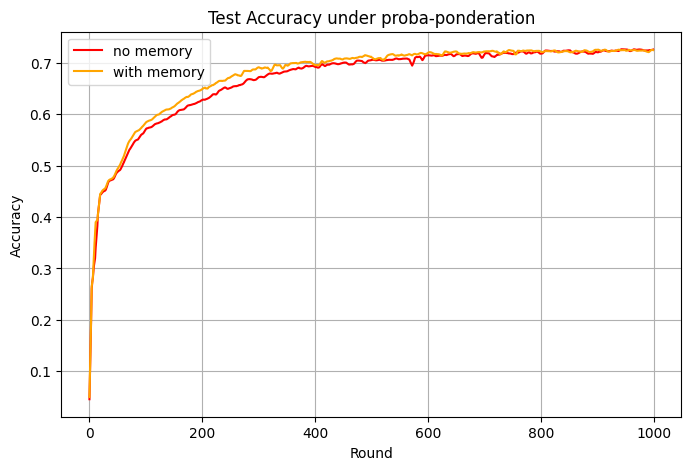

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
comparaison_proba = ['10-06-36', '10-45-40']
comparaison_mh = ['10-06-36', '10-45-40']
epochs = np.arange(len(res[comparaison[0]][0]))
plt.figure(figsize=(8, 5))
# plt.plot(epochs, np.convolve(np.array(res[comparaison[0]][4]), np.ones(10)/10)[:200], label="without gradients", color="red")
# plt.plot(epochs,  np.convolve(np.array(res[comparaison[1]][4]), np.ones(10)/10)[:200], label="with gradients", color="orange")
plt.plot(epochs, np.convolve(res[comparaison[0]][3], np.ones(5)/5)[:len(epochs)], color="red", label='no memory')
plt.plot(epochs, np.convolve(res[comparaison[1]][3], np.ones(5)/5)[:len(epochs)], color="orange", label='with memory')
# plt.plot(epochs, res[comparaison[2]][3], color="green", marker='x')
# plt.plot(epochs, res[comparaison[3]][3], color="green", marker='_')
# plt.plot(epochs, res[comparaison[4]][3], color="orange")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.title("Test Accuracy under proba-ponderation")
# pathological = mpatches.Patch(color="red", label="pathological")
# #iid = mpatches.Patch(color="orange", label="iid")
# dirichlet = mpatches.Patch(color="green", label="dirichlet")
plt.legend()
plt.grid(True)
plt.show()

## Fashion MNIST

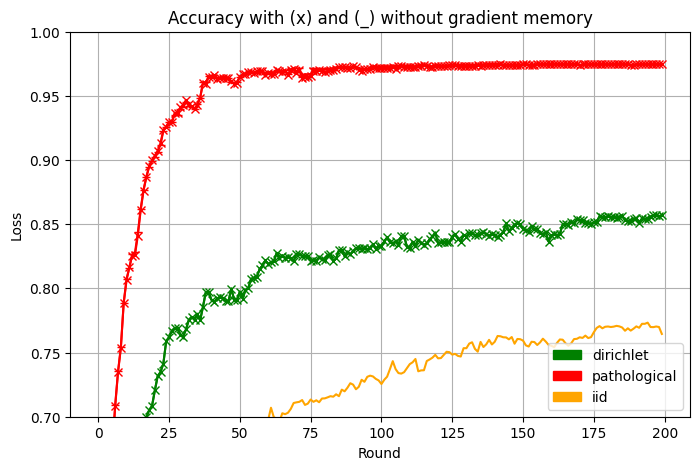

In [ ]:
log_path = 'fashionmnist_report_01/2025-09-23'
import numpy as np
import re
import os
from omegaconf import OmegaConf
def get_metrics(data):
    train_pattern = re.compile(r"Train, Round\s+(\d+): Loss=([\d\.]+), Accuracy=([\d\.]+)(, gradient_norm=([\d\.]+))?")
    # Regex to extract test metrics
    test_pattern = re.compile(r"Test, Round\s+(\d+): Loss=([\d\.]+), Accuracy=([\d\.]+)")
    rounds, train_losses, train_accuracies, grads = [], [], [], []
    test_rounds, test_losses, test_accuracies = [], [], []

    for match in train_pattern.finditer(data):
        rounds.append(int(match.group(1)))
        train_losses.append(float(match.group(2)))
        train_accuracies.append(float(match.group(3)))
        if match.group(4):
            grads.append(float(match.group(5)))


    # Parse test logs
    for match in test_pattern.finditer(data):
        test_rounds.append(int(match.group(1)))
        test_losses.append(float(match.group(2)))
        test_accuracies.append(float(match.group(3)))
        
    return train_losses, train_accuracies, test_losses, test_accuracies, grads
res = {}
for log_dir in os.listdir(log_path):
    log_file  = f'{log_path}/{log_dir}'
    with open(f'{log_file}/main.log', 'r') as f:
        data = f.read()
    config_file = OmegaConf.load(f'{log_file}/.hydra/config.yaml') 
    train_losses, train_accuracies, test_losses, test_accuracies, grads = get_metrics(data)
    res[log_dir.split('/')[-1]] = [train_losses, train_accuracies, test_losses, test_accuracies, grads]
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
comparaison = ['17-11-02', '17-11-28', '17-15-40', '17-16-10', '17-26-21']
epochs = np.arange(len(res[comparaison[0]][0]))
plt.figure(figsize=(8, 5))
# plt.plot(epochs, np.convolve(np.array(res[comparaison[0]][4]), np.ones(10)/10)[:200], label="without gradients", color="red")
# plt.plot(epochs,  np.convolve(np.array(res[comparaison[1]][4]), np.ones(10)/10)[:200], label="with gradients", color="orange")
plt.plot(epochs, res[comparaison[0]][3], color="orange")
plt.plot(epochs[:143], res[comparaison[1]][3][:143], color="red", marker='_')
plt.plot(epochs, res[comparaison[2]][3], color="red", marker='x')
plt.plot(epochs, res[comparaison[3]][3], color="green", marker='')
plt.plot(epochs, res[list(res.keys())[4]][3], color="green", marker='x')
plt.ylim((0.7, 1))
plt.xlabel("Round")
plt.ylabel("Loss")
plt.title("Accuracy with (x) and (_) without gradient memory")
pathological = mpatches.Patch(color="red", label="pathological")
iid = mpatches.Patch(color="orange", label="iid")
dirichlet = mpatches.Patch(color="green", label="dirichlet")
plt.legend(handles=[dirichlet, pathological, iid])
plt.grid(True)
plt.show()

## CIFAR-10

In [ ]:
log_path = 'matcha_full_training/2025-10-17'
import numpy as np
import re
import os
from omegaconf import OmegaConf

def get_metrics(data):
    train_pattern = re.compile(r"Train, Round\s+(\d+): Loss=([\d\.]+), Accuracy=([\d\.]+)(, gradient_norm=([\d\.]+))?")
    std_pattern = re.compile(r'std: ([\d\.]+)')
    # Regex to extract test metrics
    test_pattern = re.compile(r"Test, Round\s+(\d+): Loss=([\d\.]+), Accuracy=([\d\.]+)")
    rounds, train_losses, train_accuracies, grads = [], [], [], []
    test_rounds, test_losses, test_accuracies, std_test_acc = [], [], [], []

    for match in train_pattern.finditer(data):
        rounds.append(int(match.group(1)))
        train_losses.append(float(match.group(2)))
        train_accuracies.append(float(match.group(3)))
        if match.group(4):
            grads.append(float(match.group(5)))


    # Parse test logs
    for match in test_pattern.finditer(data):
        test_rounds.append(int(match.group(1)))
        test_losses.append(float(match.group(2)))
        test_accuracies.append(float(match.group(3)))
        
            
    if rounds == []:
        train_pattern = re.compile(r"Train, Round (\d+) : loss => ([\d\.]+),  accuracy: ([\d\.]+)")
        gradient_norm_pattern = re.compile(r"Train, Round(\d+) : gradient_norm : ([\d\.]+)")
        # Regex to extract test metrics
        test_pattern = re.compile(r"Test, Round (\d+) : loss => ([\d\.]+),  accuracy: ([\d\.]+), std: ([\d\.]+)")

        rounds, train_losses, train_accuracies, grads = [], [], [], []
        test_rounds, test_losses, test_accuracies = [], [], []

        for match in train_pattern.finditer(data):
            rounds.append(int(match.group(1)))
            train_losses.append(float(match.group(2)))
            train_accuracies.append(float(match.group(3)))
    
        for match in gradient_norm_pattern.finditer(data):
            grads.append(float(match.group(2)))

        # Parse test logs
        for match in test_pattern.finditer(data):
            test_rounds.append(int(match.group(1)))
            test_losses.append(float(match.group(2)))
            test_accuracies.append(float(match.group(3)))
        
        
    for match in std_pattern.finditer(data):
        std_test_acc.append(float(match.group(1)))
        
    center_node_distance_p = re.compile(r'Center node consensus distance : ([\d\.]+)')
    border_node_distance_p = re.compile(r'Border node consensus distance : ([\d\.]+)')
    cluster_1_distance_p =  re.compile(r'Consensus distance in cluster 1 : ([\d\.]+)')
    cluster_2_distance_p =  re.compile(r'Consensus distance in cluster 2 : ([\d\.]+)')
    
    center_node_distance, border_node_distance, cluster_1_distance, cluster_2_distance = [], [], [], []
    for match in center_node_distance_p.finditer(data):
        center_node_distance.append(float(match.group(1)))
        
    for match in border_node_distance_p.finditer(data):
        border_node_distance.append(float(match.group(1)))
    
    for match in cluster_1_distance_p.finditer(data):
        cluster_1_distance.append(float(match.group(1)))
           
    for match in cluster_2_distance_p.finditer(data):
        cluster_2_distance.append(float(match.group(1)))
        
    return train_losses, train_accuracies, test_losses, test_accuracies, grads, std_test_acc, center_node_distance, border_node_distance, cluster_1_distance, cluster_2_distance

res = {}
for log_dir in os.listdir(log_path):
    log_file  = f'{log_path}/{log_dir}'
    if os.path.isfile(log_file):
        continue
    with open(f'{log_file}/main.log', 'r') as f:
        data = f.read()
    config_file = OmegaConf.load(f'{log_file}/.hydra/config.yaml') 
    train_losses, train_accuracies, test_losses, test_accuracies, grads, std_acc, center_node_distance, border_node_distance, cluster_1_distance, cluster_2_distance = get_metrics(data)
    res[log_dir.split('/')[-1]] = [train_losses, train_accuracies, test_losses, test_accuracies, grads, std_acc, center_node_distance, border_node_distance, cluster_1_distance, cluster_2_distance ]
    

log_path = '01_dirichlet/2025-10-13'
res_for_comparaison = {}
for log_dir in os.listdir(log_path):
    log_file  = f'{log_path}/{log_dir}'
    try:
        with open(f'{log_file}/main.log', 'r') as f:
            data = f.read()
        config_file = OmegaConf.load(f'{log_file}/.hydra/config.yaml')
        train_losses, train_accuracies, test_losses, test_accuracies, grads,std_acc = get_metrics(data)
        res_for_comparaison[log_dir.split('/')[-1]] = [train_losses, train_accuracies, test_losses, test_accuracies, grads, std_acc]
    except:
        pass
        



error: unbalanced parenthesis at position 42

In [3]:
res = res | res_for_comparaison
list(res.keys())

['16-20-29',
 '16-24-35',
 '16-24-01',
 '16-20-04',
 '10-30-19',
 '16-15-53',
 '15-45-01',
 '16-58-25']

In [7]:
res

{'16-35-18': [[1.0742,
   0.9764,
   0.9281,
   0.8897,
   0.8599,
   0.8335,
   0.8088,
   0.7864,
   0.7639,
   0.7449,
   0.7233,
   0.7036,
   0.687,
   0.6755,
   0.655,
   0.638,
   0.6225,
   0.6123,
   0.5911,
   0.5832,
   0.5614,
   0.5498,
   0.5341,
   0.5207,
   0.5073,
   0.4953,
   0.4781,
   0.4632,
   0.4547,
   0.4554,
   0.4455,
   0.4515,
   0.4192,
   0.3831,
   0.3729,
   0.3655,
   0.3448,
   0.3399,
   0.3395,
   0.3126,
   0.3028,
   0.2942,
   0.2797,
   0.2624,
   0.2491,
   0.2505,
   0.2368,
   0.2241,
   0.2311,
   0.205],
  [0.60988,
   0.62848,
   0.64802,
   0.66416,
   0.67598,
   0.6845,
   0.6989,
   0.7064,
   0.7186,
   0.72568,
   0.7334,
   0.74124,
   0.75332,
   0.75582,
   0.76626,
   0.77316,
   0.77916,
   0.784,
   0.7931,
   0.79306,
   0.80526,
   0.81208,
   0.81624,
   0.82246,
   0.8296,
   0.83312,
   0.84086,
   0.84546,
   0.84962,
   0.8488,
   0.85264,
   0.849,
   0.86354,
   0.87822,
   0.88498,
   0.8845,
   0.89502,
   0.89438

In [10]:
res[mh_key][index_elem][:50]

[0.6102,
 0.6251,
 0.6413,
 0.656,
 0.6649,
 0.6699,
 0.6788,
 0.683,
 0.6946,
 0.7,
 0.7058,
 0.7128,
 0.7179,
 0.7213,
 0.7264,
 0.7305,
 0.7354,
 0.7393,
 0.7416,
 0.744,
 0.7483,
 0.7526,
 0.7553,
 0.7569,
 0.7567,
 0.7587,
 0.7623,
 0.7635,
 0.7627,
 0.76,
 0.7602,
 0.7548,
 0.7643,
 0.7703,
 0.7734,
 0.7726,
 0.777,
 0.7747,
 0.772,
 0.7785,
 0.7798,
 0.7792,
 0.7822,
 0.7808,
 0.7841,
 0.7797,
 0.7832,
 0.7813,
 0.7807,
 0.7852]

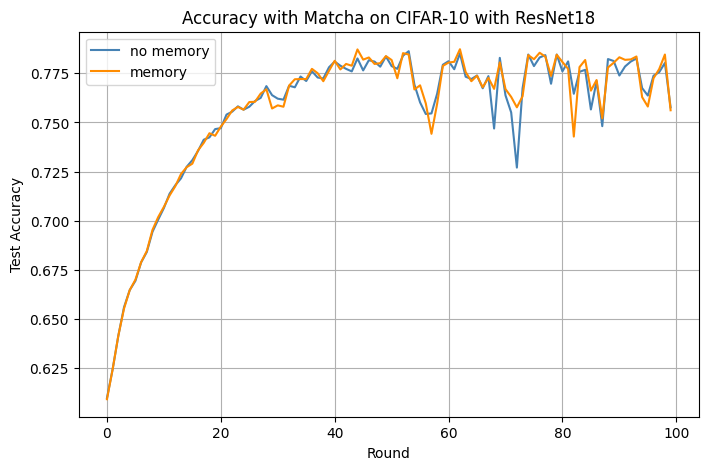

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
keys = list(res.keys())
epochs = np.arange(max(map(lambda x: len(res[x][3]), res)))
plt.figure(figsize=(8, 5))

# plt.plot(epochs, np.convolve(np.array(res[comparaison[0]][4]), np.ones(10)/10)[:200], label="without gradients", color="red")
# plt.plot(epochs,  np.convolve(np.array(res[comparaison[1]][4]), np.ones(10)/10)[:200], label="with gradients", color="orange")#
mh_key = '16-24-01'
matcha_key = '16-24-35'
index_elem = 3
std_elem = 5
epochs = 100
plt.plot(np.arange(epochs), res[mh_key][index_elem][:epochs], color="steelblue", marker='', label='no memory')
#plt.fill_between(epochs, np.array(res[mh_key][3])[:epochs] - np.array(res[mh_key][std_elem])[:epochs], np.array(res[mh_key][3])[:epochs] + np.array(res[mh_key][std_elem])[:epochs], 
#              color='steelblue', alpha=0.2)

plt.plot(np.arange(epochs), res[matcha_key][index_elem], color="darkorange", marker='', label='memory')
#plt.fill_between(epochs np.array(res[matcha_key][3])[:epochs] - np.array(res[matcha_key][std_elem])[:epochs], np.array(res[matcha_key][3])[:epochs] + np.array(res[matcha_key][std_elem]):epochs[], 
#                 color='darkorange', alpha=0.2)
#plt.plot(epochs, res[keys[3]][3], color="red", marker='_', label='no memory')
# plt.plot(epochs[:len(res[keys[1]][3])], res[keys[1]][3], color="red", marker='x', label=trali'metropolis')
# plt.plot(epochs[:len(res[keys[2]][3])], res[keys[2]][3],color="green", marker='_', label='proba')
# plt.plot(epochs[:len(res[keys[3]][3])], res[keys[3]][3], color="green", marker='x', label='proba')
#plt.ylim((0.2, 1))
plt.xlabel("Round")
plt.ylabel("Test Accuracy")
plt.title("Accuracy with Matcha on CIFAR-10 with ResNet18")
#plt.legend(handles=[dirichlet, pathological, iid])
plt.legend()
plt.grid(True)
plt.show()